## Credit Card Fraud Detection
#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset Link
https://www.kaggle.com/mlg-ulb/creditcardfraud/data

![alt text](http://wesb.com/wp-content/uploads/2018/04/creditcardfraud1280.jpg)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.shape

(284807, 31)

In [10]:
#For value counts of both the classes
x = df['Class'].value_counts()
print("Value Counts:")
print(x)
y = df.shape
fraudper = (x[1]/y[0])*100
print(fraudper,"% of fraud points only")

Value Counts:
0    284315
1       492
Name: Class, dtype: int64
0.172748563062 % of fraud points only


Extremely Unbalanced Dataset

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Dataset has all numerical features of which amount and time is given rest all 28 features are anonymized Principal Components transformed usign PCA. The output class can be either 1(in case of fraud) and otherwise 0.


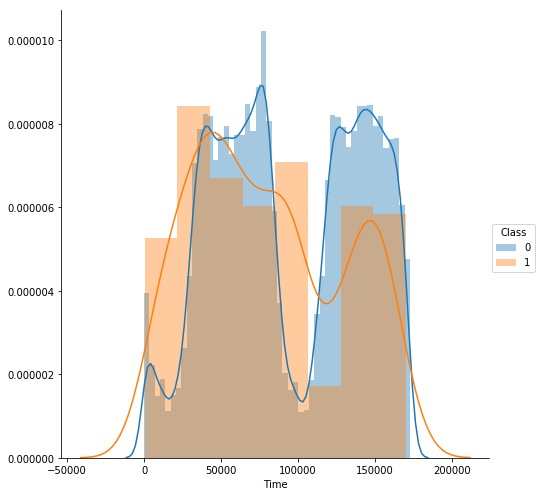

In [7]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Time")
 .add_legend())

plt.show()

Using time we can't distinguish and find the fraudulent transactions as it happens anytime of the day

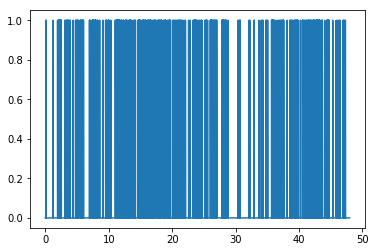

In [8]:
def sectohours(sec):
    hours = sec/(60*60)
    return hours
hours = sectohours(df['Time'])
plt.plot(hours,df['Class'])
plt.show()

Frauds happened between all the hours and most of them did not happen at a particular time

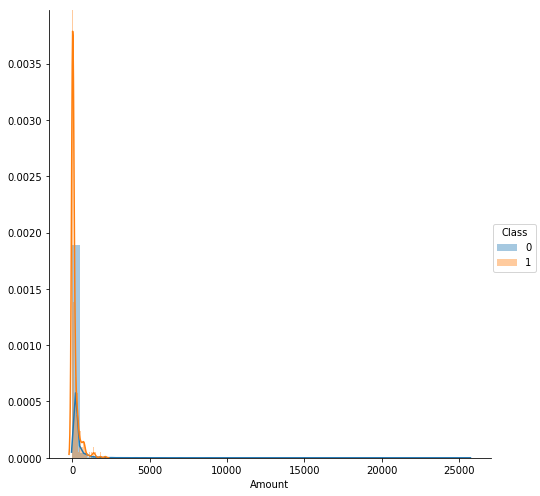

In [9]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Amount")
 .add_legend())
plt.show()

Most of the transactions are below 2000 dollars for both fraud and normal transactions

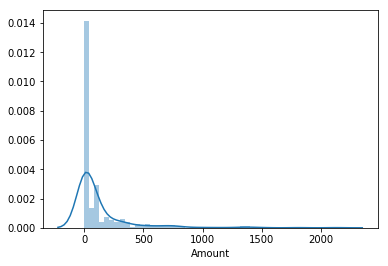

In [10]:
fraud=df.loc[df["Class"]==1]
normal=df.loc[df["Class"]==0]
sns.distplot(fraud.Amount)
plt.show()

All of the fraud transactions are below 2400 dollars and Most of them are below 500$

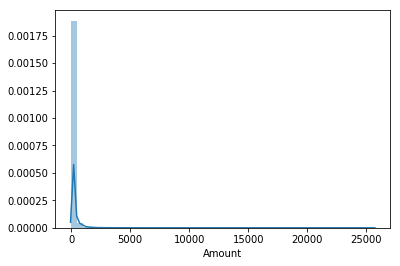

In [11]:
sns.distplot(normal.Amount)
plt.show()

We can observe that normal transactions are bit more spread than the fraud transactions in terms of amount and the non-fraud transactions mostly below 1000$

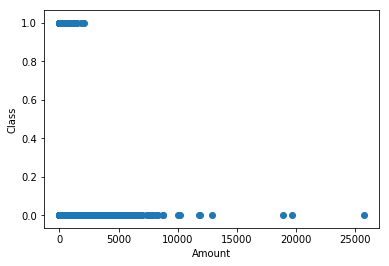

In [12]:
plt.scatter(df['Amount'],df['Class'])
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

From the scatter plot we can obeserve that only few points in normal transactions are above 10,000$

#### Correlation between features

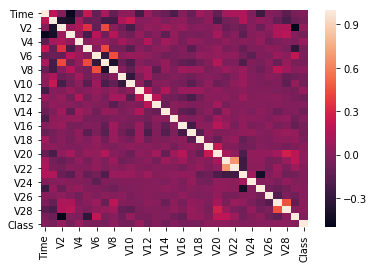

In [13]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
ax = sns.heatmap(df.corr(method='spearman'))
plt.show()

It seems the features are quite not related to each other as no points are dark orange and very few are light orange
 which means few slightly related

## Task 2 (Similarity between transactions)
As the defined metric is cosine similarity <br>
similarity(i,j) = cosine^-1(dot product (vi, vj) / (length(vi) * length(vj)) )

![alt text](http://dataaspirant.com/wp-content/uploads/2015/04/cosine.png)

In [37]:
#Sampling 100 random datapoints/rows from the table
sample100 = df.sample(100)
sample100.shape

(100, 31)

In [38]:
sample100.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27318,34497.0,1.036074,-1.010511,0.657139,-1.298448,-1.397930,-0.473776,-0.709625,0.134994,2.225403,...,0.188640,0.555594,-0.152125,0.122760,0.351305,0.037764,0.041231,0.035284,103.61,0
134093,80644.0,1.177076,0.578651,-0.376805,1.066586,0.454467,-0.208963,0.125942,0.048391,-0.359636,...,0.008581,0.107824,-0.145692,-0.410072,0.640612,-0.295782,0.045736,0.034862,1.00,0
51948,45204.0,-0.742751,0.475642,1.266253,0.514362,-0.310715,1.112718,1.079678,0.026520,0.349170,...,-0.042117,0.150953,-0.327419,-0.975982,0.344032,-0.246064,0.108742,0.060568,199.48,0
69529,53466.0,0.893483,-0.561434,-0.353750,0.198708,-0.574481,-1.185392,0.481672,-0.221789,-0.196810,...,0.114539,-0.197303,-0.222470,0.583147,0.367463,1.025588,-0.163994,0.012679,199.00,0
31057,36192.0,-1.209178,0.846116,1.968886,-0.207012,-0.170817,0.592541,-0.032847,0.311303,0.454135,...,-0.079185,0.071838,-0.203379,-0.461905,0.070494,0.330170,0.191595,0.220141,11.50,0


In [39]:
#Indexes of the 100 sampled datavalues
sample100.index

Int64Index([ 27318, 134093,  51948,  69529,  31057, 158472, 109986, 121403,
            230955, 208947,  63480,  26663, 272567, 223494, 283225, 274475,
            259774, 282306, 247580, 155729, 198896, 138592, 277810, 220537,
              5655, 275474, 124930,  94814, 217284, 154813,   7008, 210570,
            110415, 195673, 241653, 255369, 117565, 114814, 198441, 142232,
             40548, 156958, 190047,  25005, 221028, 262655, 197710, 145542,
             81941, 130238,  96112, 154059,  85865, 260128,  53704,  96740,
            277398, 241984, 257688,  71482, 202244, 245132, 144935, 106556,
            136020, 160001,   3184,   4645,  69415, 222984,  79306, 135917,
             87235,  57524, 248662, 183472, 169656, 186667, 145869, 119259,
             73815, 262966,  33942, 261553, 273838, 203968,  46666,  27417,
              5904,  88477, 274079, 128640, 178974,  67663, 249376, 199384,
             15256, 136605, 220884, 168041],
           dtype='int64')

In [40]:
#importing cosine similarity to calculate cosine similarity of each data point with the every other datapoint
from sklearn.metrics.pairwise import cosine_similarity
similar = cosine_similarity(sample100)
# similar = cosine_similarity(df.iloc[188683:188694])
print(similar.shape)

(100, 100)


In [41]:
#Cosine Similarity Matrix 
print(similar)

[[ 1.          0.99999552  0.99999899 ...,  0.99999555  0.99996431
   0.99999578]
 [ 0.99999552  1.          0.99999031 ...,  1.          0.99993458
   0.99999999]
 [ 0.99999899  0.99999031  1.         ...,  0.99999037  0.99997523
   0.99999071]
 ..., 
 [ 0.99999555  1.          0.99999037 ...,  1.          0.99993471
   0.99999999]
 [ 0.99996431  0.99993458  0.99997523 ...,  0.99993471  1.          0.99993561]
 [ 0.99999578  0.99999999  0.99999071 ...,  0.99999999  0.99993561  1.        ]]


In [42]:
similar.shape

(100, 100)

In [43]:
similar.min()

0.99993443667853621

In [46]:
similarity_arr = []
#zip to iterate through to arrays parallelly
for trans_array,head in zip(similar,sample100.index):
    l = []
    #trans_array is the list with similarity values of all points w.r.t. head
    #Making a tuple as (transaction_id,similarity with head)
    for trans_elt,index in zip(trans_array,sample100.index):
        l.append((index,trans_elt))
    
    #Sort the transactions according to the similarity(ascending order)
    new_list = sorted(l,key=lambda x:x[1],reverse=True)
    #Creating a tuple (head,list of tuple of (transaction_id,similarity with head))
    similarity_arr.append((head,new_list))    

similarity_arr[:2]     

[(27318,
  [(27318, 1.0000000000000004),
   (25005, 0.99999998467392459),
   (248662, 0.9999999432867771),
   (222984, 0.99999985448014339),
   (7008, 0.99999976616694319),
   (69529, 0.99999973360959293),
   (124930, 0.999999672456517),
   (67663, 0.99999936655299659),
   (110415, 0.99999913631860271),
   (255369, 0.99999907864641457),
   (220537, 0.99999901363107224),
   (51948, 0.99999899456223529),
   (53704, 0.99999880409545416),
   (198441, 0.99999873561849151),
   (183472, 0.99999866597597276),
   (46666, 0.9999983991072513),
   (119259, 0.99999836819905874),
   (88477, 0.99999836421328669),
   (57524, 0.99999774223245042),
   (273838, 0.99999761152739219),
   (33942, 0.99999748895375395),
   (15256, 0.99999727304251518),
   (169656, 0.99999706630058594),
   (94814, 0.99999697325002546),
   (26663, 0.99999681733419488),
   (277810, 0.99999678441366513),
   (85865, 0.99999675803267085),
   (128640, 0.99999671891660002),
   (144935, 0.99999660729489104),
   (27417, 0.9999964975203

In [47]:
#Printing the top 10 least similar transactions with respect to each transaction.
for trans in similarity_arr:
    print("--------------------------------------")
    print("Given transactions id=",trans[0],"Class:",int(sample100.loc[trans[0]].Class))
    print("--------------------------------------")
    print("Similar Transations:")
    print("--------------------")
    for elt in trans[1][:10]:
        print("Transaction id:=",elt[0],"Similarity:",elt[1],"Class:",int(sample100.loc[elt[0]].Class))
    print("\n")

--------------------------------------
Given transactions id= 27318 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 27318 Similarity: 1.0 Class: 0
Transaction id:= 25005 Similarity: 0.999999984674 Class: 0
Transaction id:= 248662 Similarity: 0.999999943287 Class: 0
Transaction id:= 222984 Similarity: 0.99999985448 Class: 0
Transaction id:= 7008 Similarity: 0.999999766167 Class: 0
Transaction id:= 69529 Similarity: 0.99999973361 Class: 0
Transaction id:= 124930 Similarity: 0.999999672457 Class: 0
Transaction id:= 67663 Similarity: 0.999999366553 Class: 0
Transaction id:= 110415 Similarity: 0.999999136319 Class: 0
Transaction id:= 255369 Similarity: 0.999999078646 Class: 0


--------------------------------------
Given transactions id= 134093 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 134093 Similarity: 1.0 Class: 0
Transaction id:= 121403 Similarity: 0.999999999802 

Transaction id:= 26663 Similarity: 0.999999989105 Class: 0
Transaction id:= 27417 Similarity: 0.999999988921 Class: 0
Transaction id:= 178974 Similarity: 0.999999987933 Class: 0


--------------------------------------
Given transactions id= 220537 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 220537 Similarity: 1.0 Class: 0
Transaction id:= 255369 Similarity: 0.999999998353 Class: 0
Transaction id:= 110415 Similarity: 0.99999999398 Class: 0
Transaction id:= 53704 Similarity: 0.999999983737 Class: 0
Transaction id:= 198441 Similarity: 0.999999981464 Class: 0
Transaction id:= 183472 Similarity: 0.999999972421 Class: 0
Transaction id:= 67663 Similarity: 0.999999958035 Class: 0
Transaction id:= 46666 Similarity: 0.999999919011 Class: 0
Transaction id:= 119259 Similarity: 0.999999916889 Class: 0
Transaction id:= 88477 Similarity: 0.999999915165 Class: 0


--------------------------------------
Given transactions id= 5655 Class: 0

Transaction id:= 249376 Similarity: 0.999999998816 Class: 0
Transaction id:= 261553 Similarity: 0.999999998739 Class: 0
Transaction id:= 282306 Similarity: 0.999999998626 Class: 0
Transaction id:= 221028 Similarity: 0.999999998465 Class: 0
Transaction id:= 257688 Similarity: 0.999999998446 Class: 0
Transaction id:= 160001 Similarity: 0.99999999841 Class: 0


--------------------------------------
Given transactions id= 40548 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 40548 Similarity: 1.0 Class: 0
Transaction id:= 71482 Similarity: 0.999999990257 Class: 0
Transaction id:= 158472 Similarity: 0.999999943713 Class: 0
Transaction id:= 51948 Similarity: 0.99999908597 Class: 0
Transaction id:= 69529 Similarity: 0.999997923599 Class: 0
Transaction id:= 4645 Similarity: 0.999997911961 Class: 0
Transaction id:= 222984 Similarity: 0.999997503715 Class: 0
Transaction id:= 5655 Similarity: 0.999997449558 Class: 0
Transaction id:= 7008

Transaction id:= 190047 Similarity: 0.999999998801 Class: 0
Transaction id:= 262966 Similarity: 0.99999999864 Class: 0
Transaction id:= 198896 Similarity: 0.999999998285 Class: 0
Transaction id:= 277398 Similarity: 0.999999998279 Class: 0
Transaction id:= 145542 Similarity: 0.999999998259 Class: 0
Transaction id:= 199384 Similarity: 0.999999997877 Class: 0
Transaction id:= 154059 Similarity: 0.999999997876 Class: 0
Transaction id:= 195673 Similarity: 0.999999997681 Class: 0
Transaction id:= 145869 Similarity: 0.999999997646 Class: 0


--------------------------------------
Given transactions id= 144935 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 144935 Similarity: 1.0 Class: 0
Transaction id:= 128640 Similarity: 0.999999995365 Class: 0
Transaction id:= 272567 Similarity: 0.999999995012 Class: 0
Transaction id:= 85865 Similarity: 0.999999994684 Class: 0
Transaction id:= 178974 Similarity: 0.999999994222 Class: 0
Transaction 

Transaction id:= 15256 Similarity: 0.99999997352 Class: 0
Transaction id:= 94814 Similarity: 0.999999966654 Class: 0
Transaction id:= 277810 Similarity: 0.999999945239 Class: 0
Transaction id:= 85865 Similarity: 0.999999943364 Class: 0
Transaction id:= 128640 Similarity: 0.999999939005 Class: 0
Transaction id:= 26663 Similarity: 0.999999936762 Class: 0


--------------------------------------
Given transactions id= 261553 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 261553 Similarity: 1.0 Class: 0
Transaction id:= 221028 Similarity: 0.999999999373 Class: 0
Transaction id:= 260128 Similarity: 0.999999999328 Class: 0
Transaction id:= 249376 Similarity: 0.999999999291 Class: 0
Transaction id:= 160001 Similarity: 0.999999999254 Class: 0
Transaction id:= 138592 Similarity: 0.999999999253 Class: 0
Transaction id:= 283225 Similarity: 0.999999999235 Class: 0
Transaction id:= 282306 Similarity: 0.999999999211 Class: 0
Transaction id:

Transaction id:= 282306 Similarity: 0.999999998806 Class: 0
Transaction id:= 249376 Similarity: 0.999999998741 Class: 0
Transaction id:= 257688 Similarity: 0.999999998696 Class: 0
Transaction id:= 156958 Similarity: 0.99999999865 Class: 0
Transaction id:= 283225 Similarity: 0.999999998629 Class: 0
Transaction id:= 160001 Similarity: 0.999999998543 Class: 0


--------------------------------------
Given transactions id= 220884 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 220884 Similarity: 1.0 Class: 0
Transaction id:= 69415 Similarity: 0.999998528638 Class: 0
Transaction id:= 5655 Similarity: 0.999992429801 Class: 0
Transaction id:= 4645 Similarity: 0.999991351487 Class: 0
Transaction id:= 158472 Similarity: 0.999985576217 Class: 0
Transaction id:= 40548 Similarity: 0.999983793906 Class: 0
Transaction id:= 71482 Similarity: 0.999983183675 Class: 0
Transaction id:= 51948 Similarity: 0.999975227525 Class: 0
Transaction id:= 69